In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

In [61]:
data = pd.read_csv('letter-recognition.data')

In [62]:
data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [12]:
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

data = pd.read_csv('letter-recognition.data', header=None, names=columns)


In [ ]:
# letter,x-box, y-box, width, high, onpix, x-bar, y-bar, x2bar, y2bar, xybar, x2ybar, xy2bar, x-ege, xegvy, y-ege, yegvx

In [13]:
data.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [15]:
data.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [16]:
x = data.drop('letter', axis=1)
y= data['letter']

In [20]:
label_encode = LabelEncoder()

In [21]:
y_encode = label_encode.fit_transform(y)

In [34]:
y_cat = to_categorical(y_encode)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [46]:
model = Sequential([
    Input(shape=(X_train_scale.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(26, activation='softmax')
])

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,370 (52.23 KB)

 Trainable params: 13,370 (52.23 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train_scale, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4022 - loss: 2.2123 - val_accuracy: 0.7538 - val_loss: 0.8380
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7760 - loss: 0.7688 - val_accuracy: 0.8075 - val_loss: 0.6184
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8314 - loss: 0.5646 - val_accuracy: 0.8462 - val_loss: 0.5106
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8670 - loss: 0.4526 - val_accuracy: 0.8806 - val_loss: 0.4010
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8934 - loss: 0.3694 - val_accuracy: 0.8975 - val_loss: 0.3467
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9039 - loss: 0.3159 - val_accuracy: 0.9069 - val_loss: 0.3200
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2658 - val_accuracy: 0.9100 - val_loss: 0.2884
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9282 - loss: 0.2358 - val_accuracy: 0.

In [51]:
test_loss, test_accuracy = model.evaluate(X_test_scale, Y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9506 - loss: 0.2066


In [52]:
test_loss

0.19044801592826843

In [53]:
test_accuracy

0.9524999856948853

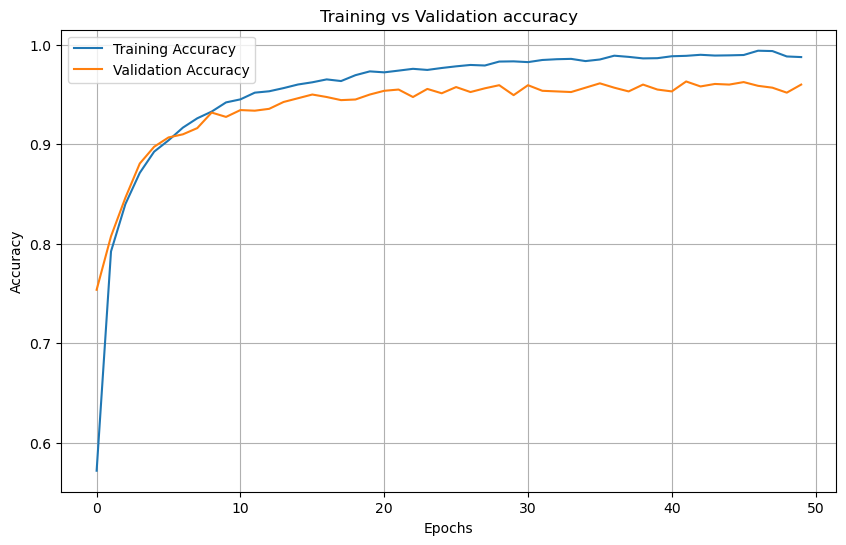

In [58]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation accuracy')
plt.legend()
plt.grid(True)
plt.show()